<a href="https://colab.research.google.com/github/GabyLeon10100/MujeresDigitales/blob/main/Taller5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Un fanático de pokemones le pide analizar los datos de pokemones, para esto se le proporciona un conjunto de datos en archivo csv. Este fanático le pide a usted como analista investigar cuales son los pokemones con mayor ataque.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving pokemon_data.csv to pokemon_data.csv


In [3]:
df = pd.read_csv('pokemon_data.csv')

## Ejercicio 1:

Calcule el promedio y la mediana del ataque de: 
1. Todos los pokemones
2. Los pokemones agrupados por Legendary (es decir el promedio y mediana de pokemones legendarios y no legendarios)
3. Los pokemones agrupados por Type 1

In [4]:
#Mostramos los datos para poder manipularlos despues 
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [70]:
#PRIMER PUNTO
#Promedio y mediana de todos los pokemones
print("Promedio de ataque todos los pokemones")
print(df["Attack"].mean())
print("Mediana de ataque de todos los pokemones")
print(df["Attack"].median())

Promedio de ataque todos los pokemones
79.00125
Mediana de ataque de todos los pokemones
75.0


In [71]:
#SEGUNDO PUNTO
#Creamos dos dataframes separando por los que son y los que no son legendarios
mask = df['Legendary'] == True
mask1 = df['Legendary'] == False
df_legendary = df[mask]
df_nolegendary = df[mask1]
print("Promedio de ataque de los pokemones legendarios")
print(df_legendary['Attack'].mean())
print("Mediana de ataque de los pokemones legendarios")
print(df_legendary['Attack'].median())
print("Promedio de ataque de los pokemones no legendarios")
print(df_nolegendary['Attack'].mean())
print("Mediana de ataque de los pokemones no legendarios")
print(df_nolegendary['Attack'].median())

Promedio de ataque de los pokemones legendarios
116.67692307692307
Mediana de ataque de los pokemones legendarios
110.0
Promedio de ataque de los pokemones no legendarios
75.66938775510204
Mediana de ataque de los pokemones no legendarios
72.0


In [72]:
#TERCER PUNTO
#Agrupamos los pokemos por el type1 y le sacamos el promedio y la mediana
print("Promedio por Type 1")
promediot = df.groupby(["Type 1"]).Attack.mean()
print(promediot)
print("Mediana por Type 1")
mediat = df.groupby(["Type 1"]).Attack.median()
print(mediat)

Promedio por Type 1
Type 1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: Attack, dtype: float64
Mediana por Type 1
Type 1
Bug          65.0
Dark         88.0
Dragon      113.5
Electric     65.0
Fairy        52.0
Fighting    100.0
Fire         84.5
Flying       85.0
Ghost        66.0
Grass        70.0
Ground       85.0
Ice          67.0
Normal       70.5
Poison       74.0
Psychic      57.0
Rock         95.0
Steel        89.0
Water        72.0
Name: Attack, dtype: float64


## Ejercicio 2:

Grafique el ataque de los pokemones con un grafico boxplot para los siguientes casos:
1. Todos los pokemones
2. Los pokemones agrupados por Legendary (es decir el promedio y mediana de pokemones legendarios y no legendarios)
3. Los pokemones agrupados por Type 1

<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


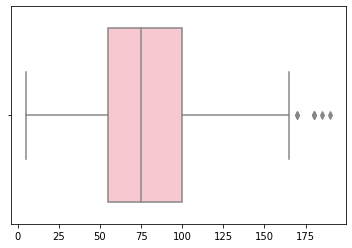

In [63]:
#PRIMER PUNTO
#Grafica del ataque de todos los pokemones
data = df['Attack'].values
sns.boxplot(data, color='pink')

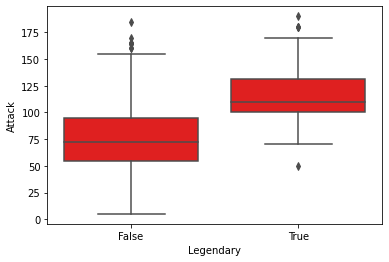

In [73]:
#SEGUNDO PUNTO
sns.boxplot(x='Legendary', y='Attack',data=df, color='Red')

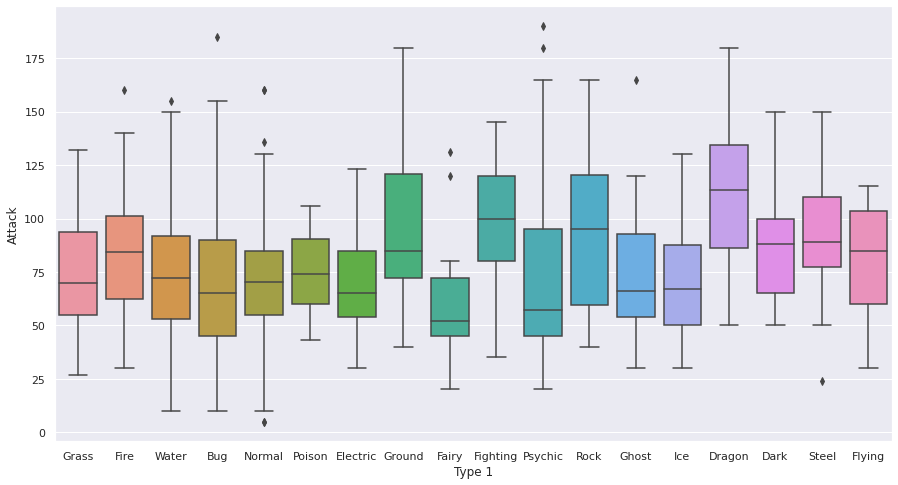

In [77]:
#TERCER PUNTO
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='Type 1', y='Attack',data=df)

## Ejercicio 3:

Realice las siguientes pruebas de hipótesis:
1. El promedio del ataque de los pokemones es mayor a 77
2. El promedio del ataque de los pokemones legendarios es diferente a los no legendarios


Y determine con un nivel de significancia del 5% (es decir $\alpha$ = 0.05), si podemos rechazar o no las 3 hipótesis anteriores. 

In [92]:
T, p = stats.ttest_1samp(df['Attack'], popmean = 77)
p_value = p/2
p_value

0.04077652822594917

Debido que el resultado que nos arroja es 0.04 y es menor que 0.05, podemos definir que la hipotesis es correcta.

In [101]:
legendary = df_legendary.Attack
no_legendary = df_nolegendary.Attack

statistic, pvalue = stats.ttest_ind(legendary, no_legendary, equal_var=False)
statistic, pvalue

(10.438133539322203, 2.520372449236646e-16)

El valor pvalue (2.52) es muy pequeño que el 0.05, por lo tanto se podria concluir que la hipotesis es verdadera y los datos del legendario son diferentes a los no legendarios.

La razon que de verdadero la hipotesis es porque estabamos buscando con el metodo anterior a ver si eran iguales pero nos dio que no, y la hipotesis eso era lo que planteaba

***GABRIELA LEÓN GONZÁLEZ***